### Tarefa 05

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


In [48]:
df=pd.read_csv('/content/Profissao- Cientista de Dados_M10_support material.csv')

In [49]:
df=df.drop(columns=['Unnamed: 0'],axis=1)
df.set_index('index',inplace=True)
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,,,,,,,,,,,,,,
8682,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
12830,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2885,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
16168,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
12438,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 8682 to 12895
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  mau                    15000 non-null  bool   
 13  renda                  15000 non-null  float64
dtypes: bool(3), float64(3), int64(2), object(6)
memory 

In [54]:
df['posse_de_imovel']=df['posse_de_imovel'].astype(str)
df['posse_de_veiculo']=df['posse_de_veiculo'].astype(str)
df['mau']=df['mau'].astype(str)


In [6]:
#df['sexo']=df['sexo'].replace('M',1).replace('F',0)
#df['posse_de_veiculo']=df['posse_de_veiculo'].replace('False',0).replace('True',1)
#df['posse_de_imovel']=df['posse_de_imovel'].replace('True',1).replace('False',0)
#df['mau']=df['mau'].replace('True',1).replace('False',0)


In [55]:
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,,,,,,,,,,,,,,
8682,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
12830,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2885,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
16168,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
12438,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [56]:
variavel_quantitativa=df.select_dtypes(exclude='O')

In [57]:
variavel_quantitativa.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
index,,,,,
8682,1,36,3.575342,3.0,3369.24
12830,0,42,0.860274,2.0,6096.14
2885,2,31,8.065753,4.0,5658.98
16168,0,50,1.208219,2.0,7246.69
12438,0,52,13.873973,2.0,4017.37


In [10]:
variavel_quantitativa.groupby(['mau','qtd_filhos','qt_pessoas_residencia'])['idade'].mean()

mau  qtd_filhos  qt_pessoas_residencia
0    0           1.0                      47.133861
                 2.0                      46.965526
     1           2.0                      38.598684
                 3.0                      36.915760
     2           3.0                      37.296296
                 4.0                      36.089971
     3           4.0                      35.571429
                 5.0                      36.400000
     4           6.0                      37.947368
     5           6.0                      42.000000
                 7.0                      31.000000
     7           9.0                      37.000000
     14          15.0                     48.000000
1    0           1.0                      47.052632
                 2.0                      45.880000
     1           1.0                      34.000000
                 2.0                      32.818182
                 3.0                      37.609756
     2           1.0     

<AxesSubplot:>

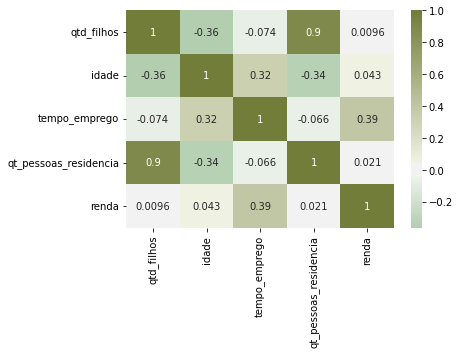

In [58]:
cmap=sns.diverging_palette(h_neg=125,h_pos= 455,sep=10,center='light',as_cmap=True)
sns.heatmap(variavel_quantitativa.corr(),annot=True, center=0,cmap=cmap)

* Identificamos que a **qtd_pessoas_residencia** e **qtd_filhos** possuem muita correlação possitiva assim como **tempo_emprego** e **renda** também. 


<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

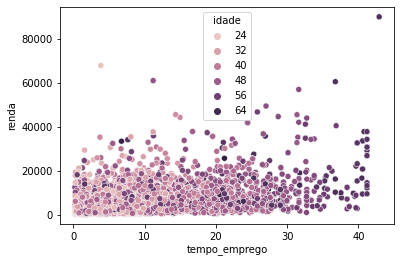

In [70]:
sns.scatterplot(data=variavel_quantitativa,x='tempo_emprego',y='renda', hue='idade')

* Acredito que existam alguns outliers na renda por desses pontos discrepantes 

In [71]:
aqui=variavel_quantitativa.copy()
aqui['log_renda']=np.log(variavel_quantitativa['renda'])
aqui.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_renda,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


<AxesSubplot:xlabel='tempo_emprego', ylabel='log_renda'>

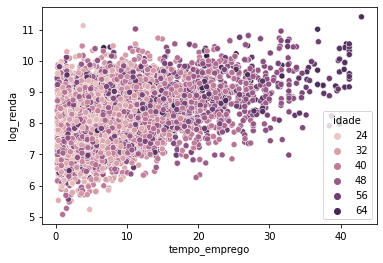

In [75]:
sns.scatterplot(data=aqui, x='tempo_emprego', y='log_renda', hue='idade')

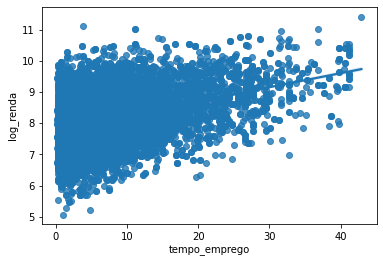

In [76]:
_=sns.regplot(x='tempo_emprego',y='log_renda',data=aqui)

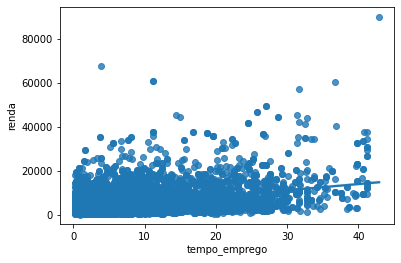

In [77]:
_=sns.regplot(x='tempo_emprego',y='renda',data=aqui)

* Acredito que com aplicação do LOG análise fica melhor tendo em vista que as discrepâncias em comparação com os valores originais são menores.
